In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import os
import math


df = pd.read_csv("cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# remove id column
df.drop(columns="id", inplace=True)

In [5]:
# show missing values using tabular
import tabulate

print(tabulate.tabulate(df.isnull().sum().reset_index(), headers=['Column Name', 'Missing values']))


    Column Name      Missing values
--  -------------  ----------------
 0  age                           0
 1  gender                        0
 2  height                        0
 3  weight                        0
 4  ap_hi                         0
 5  ap_lo                         0
 6  cholesterol                   0
 7  gluc                          0
 8  smoke                         0
 9  alco                          0
10  active                        0
11  cardio                        0


In [6]:
# check for duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  24


In [7]:
# find out which rows is duplicated

duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows.head()

# drop all duplicated rows
df.drop_duplicates(inplace=True)


In [8]:
# check for outliers
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022763 -0.081546  0.053697  0.020765  0.017647   
gender      -0.022763  1.000000  0.499080  0.155320  0.005996  0.015241   
height      -0.081546  0.499080  1.000000  0.290983  0.005488  0.006151   
weight       0.053697  0.155320  0.290983  1.000000  0.030693  0.043695   
ap_hi        0.020765  0.005996  0.005488  0.030693  1.000000  0.016084   
ap_lo        0.017647  0.015241  0.006151  0.043695  0.016084  1.000000   
cholesterol  0.154432 -0.035915 -0.050225  0.141679  0.023768  0.024004   
gluc         0.098704 -0.020558 -0.018592  0.106790  0.011833  0.010794   
smoke       -0.047650  0.338131  0.188003  0.067725 -0.000928  0.005177   
alco        -0.029735  0.170950  0.094425  0.067071  0.001403  0.010594   
active      -0.009918  0.005917 -0.006569 -0.016863 -0.000031  0.004784   
cardio       0.238189  0.008037 -0.010871  0.181599  0.054475  0.065717   

             cholesterol

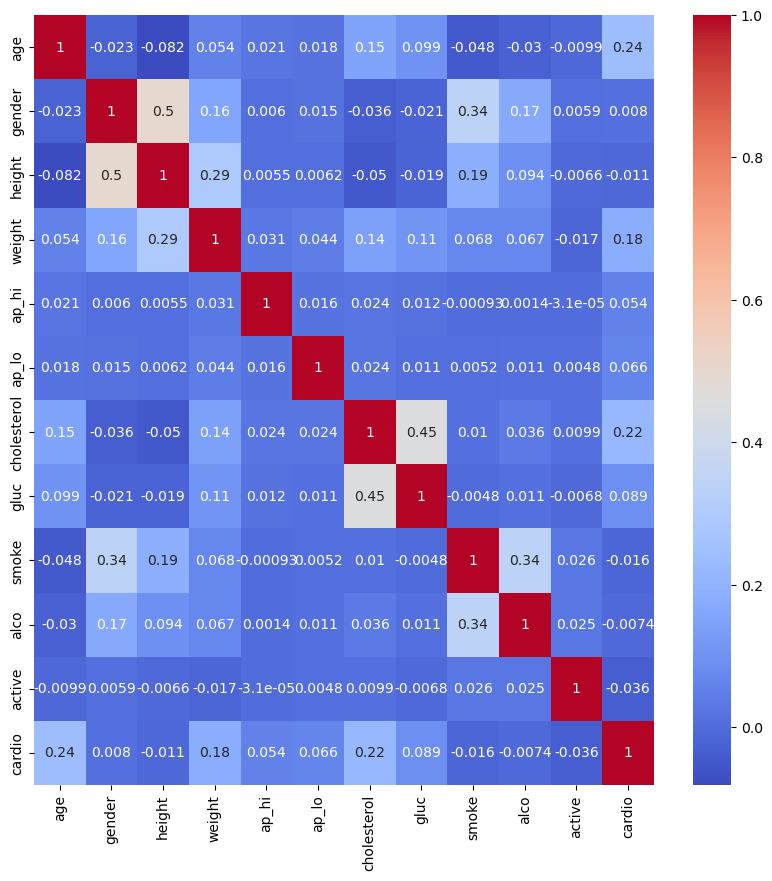

In [9]:
# sử dụng hàm corr của sklearn
corr = df.corr()

print(corr)

# plot correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

[[1.0, -0.022762992082852866, -0.08154587611430099, 0.05369669266922514, 0.020765211592119824, 0.01764684317070176, 0.1544317962678454, 0.09870390408203283, -0.04765001812518122, -0.02973491914528407, -0.009917915055978301, 0.23818879646157942], [-0.022762992082852866, 1.0, 0.49907977557197597, 0.15531960547805324, 0.00599610714986529, 0.015241020683314377, -0.0359146478863102, -0.020557984585664726, 0.3381312716347304, 0.1709501893890585, 0.005917036566748882, 0.008037141137971195], [-0.08154587611430099, 0.49907977557197597, 1.0, 0.29098294466996283, 0.005488248286024629, 0.006151320949568499, -0.050225339891839506, -0.0185921803156705, 0.18800265841208275, 0.09442547765076405, -0.0065685747238347705, -0.010871355024164609], [0.05369669266922514, 0.15531960547805324, 0.29098294466996283, 1.0, 0.030692870253645543, 0.043695353474902054, 0.14167898128620987, 0.10678990005658795, 0.06772527396313345, 0.0670713794921074, -0.016862928490248022, 0.18159930932501686], [0.020765211592119824,

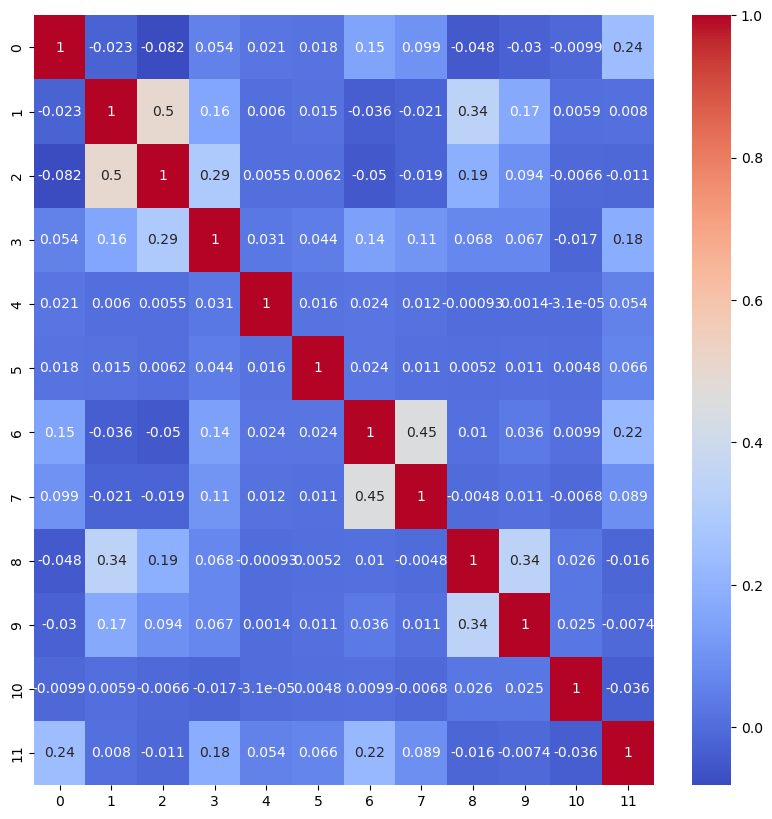

In [10]:
# sử dụng hàm corr tự xây dựng
from utils.utils import corr_matrix


corr_mat = corr_matrix(df.values)

print(corr_mat)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.show()



In [11]:
# # drop features with different correlation < 0.1
# df.drop(columns=["gender", "height", "active"], inplace=True)


In [12]:
# split data into train and test set
from utils.utils import train_test_split
# from sklearn.model_selection import train_test_split
X = df.drop(columns="cardio")
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scale data
from algorithm.scaler import Scaler

scaler = Scaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# train model sử dụng sk learn logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy logistic regression: ", score)

# train model sử dụng sklearn decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy decision tree: ", score)

Accuracy logistic regression:  0.723135181480423
Accuracy decision tree:  0.6291083166619034


In [14]:
# import time


# def insert_to_db(tbl, algo, score):
#     # connect to db
#     conn = DBConnection()
#     # get current timestamp
#     timestamp = int(time.time())
#     # insert to db
#     query = f"INSERT INTO {tbl} (algo, score, timestamp) VALUES ('{algo}', {score}, {timestamp})"
    



In [15]:
# print test data and prediction
df_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_test.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,1,1
8,1,1
9,1,0


In [16]:
# train model sử dụng hàm logistic regression (Minh Tuan)

from algorithm.logisticRegression import LogisticRegression as myLogisticRegression

my_lr = myLogisticRegression()

# train model
my_lr.fit(X_train, y_train)

# predict
y_pred = my_lr.predict(X_test)

# print model accuracy
print("Model accuracy myLogisticRegression: ", my_lr.score(X_test, y_test))


Model accuracy myLogisticRegression:  0.6508288082309232


In [17]:
# train model sử dụng Decision Tree (Duong Giang)

from algorithm.decisionTree import DecisionTree as myDecisionTree

my_dt = myDecisionTree(max_depth=2)

# train model
my_dt.fit(X_train, y_train)

# predict
y_pred = my_dt.predict(X_test)

# print model accuracy
print("Model accuracy myDecisionTree: ", my_dt.score(X_test, y_test))

Model accuracy myDecisionTree:  0.717347813661046
